In [1]:
from yahooquery import Ticker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
nvda = Ticker('PG')

In [3]:
df=nvda.history(start='2014-01-01', end='2023-12-31', period='max') 
df

open        high         low       close    volume  \
symbol date                                                                   
PG     2014-01-02   81.330002   81.360001   80.320000   80.540001   6981700   
       2014-01-03   80.760002   80.849998   80.190002   80.449997   6925600   
       2014-01-06   80.610001   80.980003   80.300003   80.639999   7208200   
       2014-01-07   80.709999   81.580002   80.620003   81.419998   7158200   
       2014-01-08   80.970001   81.150002   80.050003   80.239998  13458800   
...                       ...         ...         ...         ...       ...   
       2023-12-22  144.500000  145.630005  144.289993  145.279999   4412800   
       2023-12-26  145.089996  146.169998  144.970001  145.940002   3634900   
       2023-12-27  145.649994  146.309998  145.360001  146.059998   4569400   
       2023-12-28  146.000000  146.009995  145.039993  145.729996   5023000   
       2023-12-29  146.000000  146.960007  145.729996  146.539993   5300900   

                     adjclose  dividends  
symbol date                               
PG     2014-01-02   60.028877        0.0  
       2014-01-03   59.961807        0.0  
       2014-01-06   60.103405        0.0  
       2014-01-07   60.684776        0.0  
       2014-01-08   59.805279        0.0  
...                       ...        ...  
       2023-12-22  144.368240        0.0  
       2023-12-26  145.024109        0.0  
       2023-12-27  145.143356        0.0  
       2023-12-28  144.815414        0.0  
       2023-12-29  145.620331        0.0  

[2516 rows x 7 columns]

In [4]:
# Save data in memory to disk
df.to_csv('Data_Stock_Date.csv')

In [5]:
# read data from disk to memory
import pandas as pd
df = pd.read_csv('Data_Stock_Date.csv')
df

,symbol,date,open,high,low,close,volume,adjclose,dividends
0,PG,2014-01-02,81.330002,81.360001,80.320000,80.540001,6981700,60.028877,0.0
1,PG,2014-01-03,80.760002,80.849998,80.190002,80.449997,6925600,59.961807,0.0
2,PG,2014-01-06,80.610001,80.980003,80.300003,80.639999,7208200,60.103405,0.0
3,PG,2014-01-07,80.709999,81.580002,80.620003,81.419998,7158200,60.684776,0.0
4,PG,2014-01-08,80.970001,81.150002,80.050003,80.239998,13458800,59.805279,0.0
...,...,...,...,...,...,...,...,...,...
2511,PG,2023-12-22,144.500000,145.630005,144.289993,145.279999,4412800,144.368240,0.0
2512,PG,2023-12-26,145.089996,146.169998,144.970001,145.940002,3634900,145.024109,0.0
2513,PG,2023-12-27,145.649994,146.309998,145.360001,146.059998,4569400,145.143356,0.0
2514,PG,2023-12-28,146.000000,146.009995,145.039993,145.729996,5023000,144.815414,0.0


In [6]:
dataset = df.dropna() 
dataset = dataset[['open', 'high', 'low', 'close']]

dataset['H-L'] = dataset['high'] - dataset['low'] 
dataset['O-C'] = dataset['close'] - dataset['open'] 
dataset['20day MA'] = dataset['close'].shift(1).rolling(window = 20).mean() 
dataset['200day MA'] = dataset['close'].shift(1).rolling(window = 200).mean() 
dataset['20day EMA'] = dataset['close'].shift(1).ewm(span=5, adjust=True).mean()


dataset['Std_dev']= dataset['close'].rolling(5).std() 

dataset['Price_Rise'] = np.where(dataset['close'].shift(-1) > dataset['close'], 1, 0)
dataset = dataset.dropna()
dataset.head()

,open,high,low,close,H-L,O-C,20day MA,200day MA,20day EMA,Std_dev,Price_Rise
200,82.949997,83.480003,82.029999,83.269997,1.450005,0.320000,83.870001,80.65920,83.056301,0.515637,1
201,83.250000,84.330002,82.830002,84.180000,1.500000,0.930000,83.810001,80.67285,83.127533,0.718451,1
202,84.470001,84.639999,83.660004,84.610001,0.979996,0.139999,83.778501,80.69150,83.478356,0.951973,0
203,84.059998,84.589996,83.919998,84.230003,0.669998,0.170006,83.787001,80.71135,83.855571,0.955999,0
204,84.260002,84.330002,82.300003,83.230003,2.029999,-1.029999,83.736501,80.72540,83.980381,0.619904,1


In [7]:
dataset.describe()

,open,high,low,close,H-L,O-C,20day MA,200day MA,20day EMA,Std_dev,Price_Rise
count,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000
mean,111.494227,112.326598,110.703618,111.529948,1.622979,0.035721,111.248074,108.561624,111.448503,1.012523,0.522021
std,28.347177,28.616011,28.093311,28.351195,1.148218,1.158254,28.231660,27.027643,28.308764,0.831379,0.499623
min,68.019997,68.300003,65.019997,68.059998,0.309998,-9.630005,69.643000,76.945850,68.553085,0.053197,0.000000
25%,85.122498,85.577501,84.589996,85.157503,0.880005,-0.440002,84.892374,84.395725,85.190814,0.492779,0.000000
50%,105.985001,106.875000,105.200001,106.095001,1.330002,0.070000,105.737251,93.723675,105.687053,0.788942,1.000000
75%,139.240002,140.434994,138.199997,139.264996,2.002499,0.572504,139.753625,135.741300,139.286132,1.257656,1.000000
max,164.399994,165.350006,163.399994,164.210007,14.949997,7.570000,161.622000,151.743700,163.404134,9.088996,1.000000


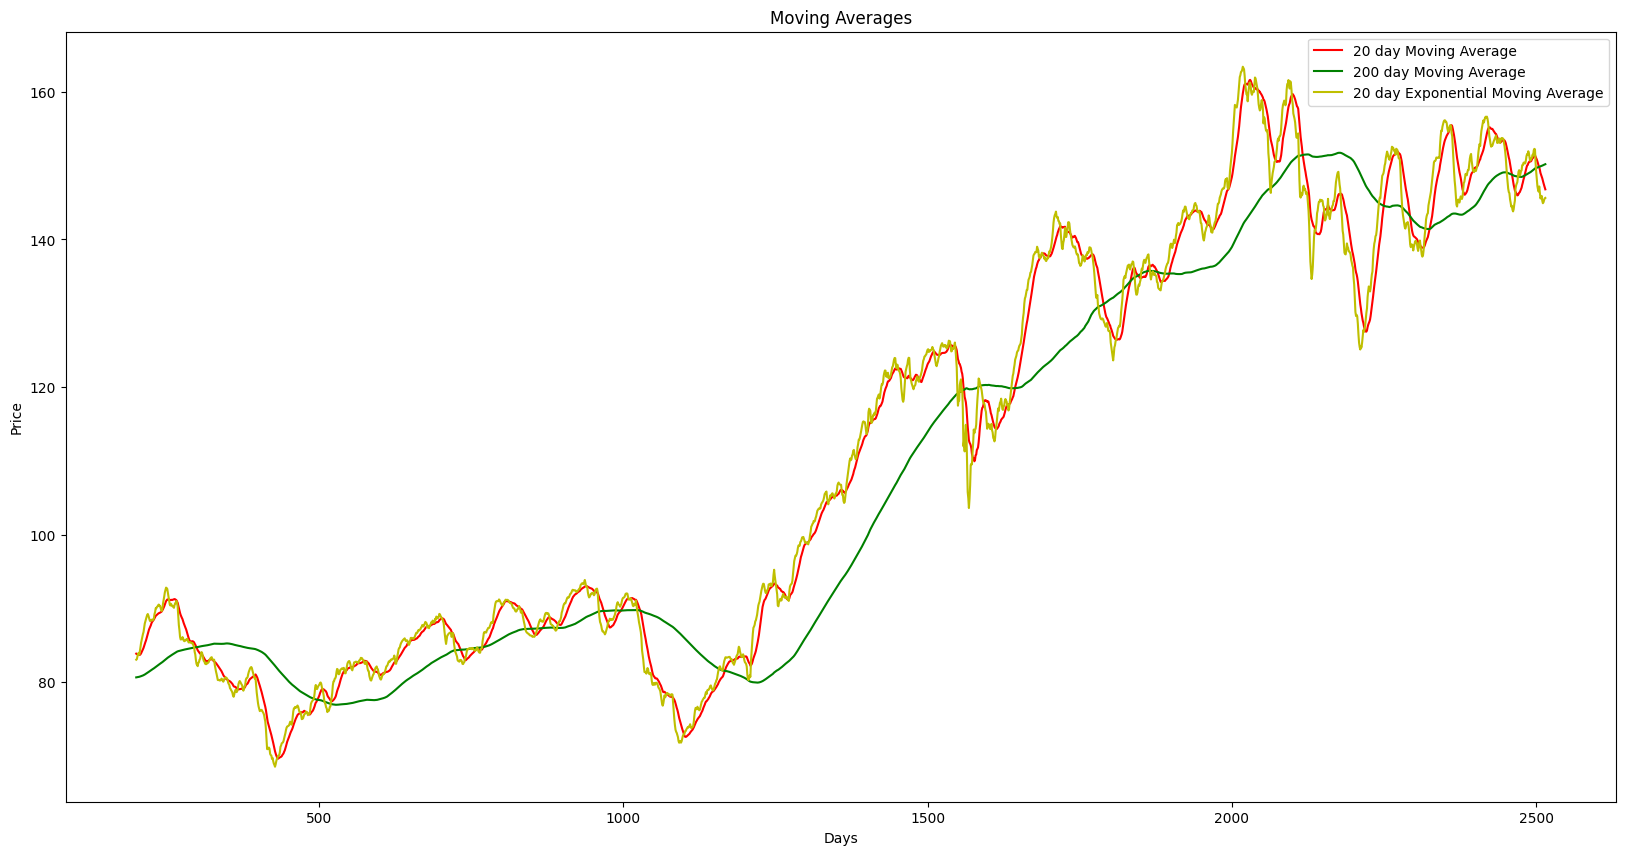

In [8]:
plt.figure(figsize=(20,10))
plt.plot(dataset['20day MA'], label='20 day Moving Average', color='r')
plt.plot(dataset['200day MA'], label='200 day Moving Average', color='g')
plt.plot(dataset['20day EMA'], label='20 day Exponential Moving Average', color='y')
plt.legend()
plt.title('Moving Averages')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Standard Deviation')

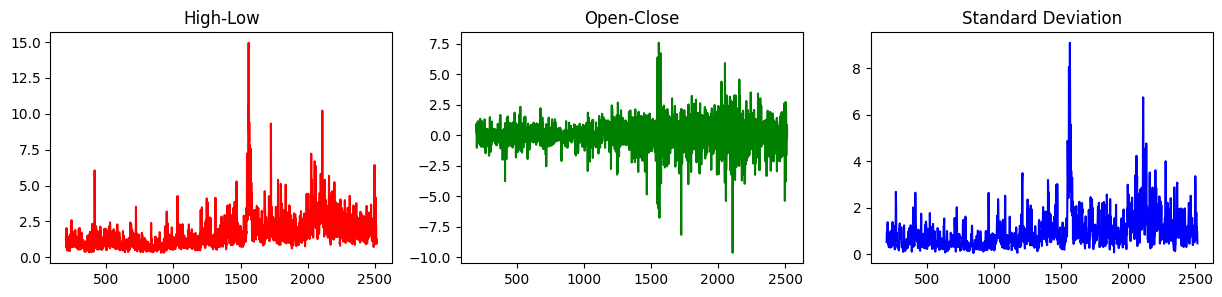

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
axes[0].plot(dataset['H-L'], label='High-Low', color='r')
axes[0].set_title('High-Low')

axes[1].plot(dataset['O-C'], label='Open-Close', color='g')
axes[1].set_title('Open-Close')

axes[2].plot(dataset['Std_dev'], label='Standard Deviation', color='b')
axes[2].set_title('Standard Deviation')

Text(0.5, 1.0, '20 day Exponential Moving Average')

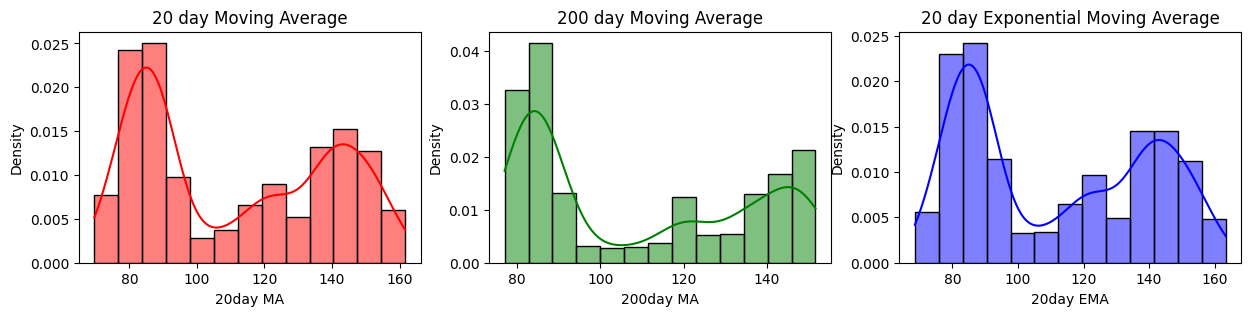

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(dataset,x="20day MA", kde=True, stat="density", ax=axes[0], color='r')
axes[0].set_title('20 day Moving Average')

sns.histplot(dataset,x="200day MA", kde=True, stat="density", ax=axes[1], color='g')
axes[1].set_title('200 day Moving Average')

sns.histplot(dataset,x="20day EMA", kde=True, stat="density", ax=axes[2], color='b')
axes[2].set_title('20 day Exponential Moving Average')

/Users/pulkitgupta/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/relational.py:432: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Users/pulkitgupta/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/relational.py:432: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


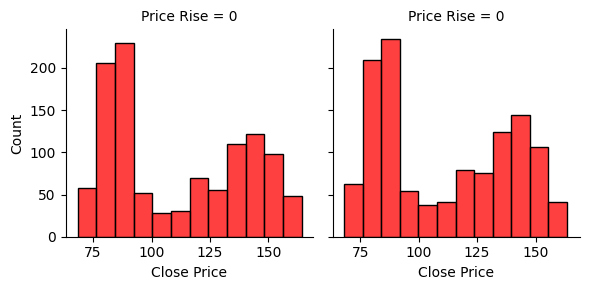

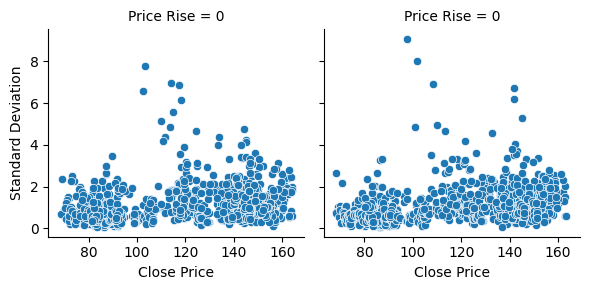

In [11]:
chart = sns.FacetGrid(dataset, col='Price_Rise')
chart.map(sns.histplot, 'close', color='r')
chart.set_axis_labels('Close Price', 'Count')
chart.set_titles('Price Rise = 0', 'Price Rise = 1')

chart = sns.FacetGrid(dataset, col='Price_Rise')
chart.map(sns.scatterplot, 'close', 'Std_dev', cmap='coolwarm')
chart.set_axis_labels('Close Price', 'Standard Deviation')
chart.set_titles('Price Rise = 0', 'Price Rise = 1')


In [12]:
X = dataset.iloc[:, 4:-1] 
y = dataset.iloc[:, -1]

In [13]:
X

,H-L,O-C,20day MA,200day MA,20day EMA,Std_dev
200,1.450005,0.320000,83.870001,80.659200,83.056301,0.515637
201,1.500000,0.930000,83.810001,80.672850,83.127533,0.718451
202,0.979996,0.139999,83.778501,80.691500,83.478356,0.951973
203,0.669998,0.170006,83.787001,80.711350,83.855571,0.955999
204,2.029999,-1.029999,83.736501,80.725400,83.980381,0.619904
...,...,...,...,...,...,...
2511,1.340012,0.779999,147.940501,150.037051,144.908225,1.052031
2512,1.199997,0.850006,147.635500,150.080601,145.032149,1.000485
2513,0.949997,0.410004,147.370500,150.124351,145.334767,0.972214
2514,0.970001,-0.270004,147.059000,150.163951,145.576511,0.730673


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_test

,H-L,O-C,20day MA,200day MA,20day EMA,Std_dev
2052,6.690002,5.910004,158.918501,146.119700,155.717993,3.124855
2053,3.369995,-0.399994,158.874001,146.233200,156.558664,2.584771
2054,3.059998,-1.000000,158.643501,146.324050,156.335776,2.527843
2055,2.479996,0.829987,158.286501,146.400550,155.327183,2.514934
2056,2.089996,0.589996,157.989001,146.480850,154.814786,1.996869
...,...,...,...,...,...,...
2511,1.340012,0.779999,147.940501,150.037051,144.908225,1.052031
2512,1.199997,0.850006,147.635500,150.080601,145.032149,1.000485
2513,0.949997,0.410004,147.370500,150.124351,145.334767,0.972214
2514,0.970001,-0.270004,147.059000,150.163951,145.576511,0.730673


In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

LOGISTIC REGRESSION

In [16]:
logreg = LogisticRegression(max_iter=1000000)
logreg.fit(X_train, Y_train)
Y_logreg_pred = logreg.predict(X_test)
print (classification_report(Y_test, Y_logreg_pred))

              precision    recall  f1-score   support

           0       0.52      0.10      0.16       226
           1       0.52      0.92      0.66       238

    accuracy                           0.52       464
   macro avg       0.52      0.51      0.41       464
weighted avg       0.52      0.52      0.42       464



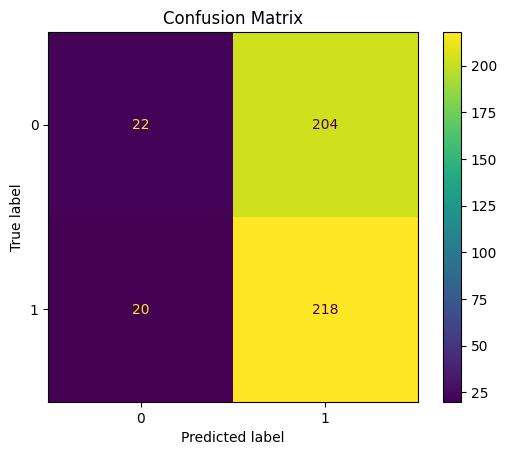

In [17]:
matrix = ConfusionMatrixDisplay.from_estimator(logreg, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

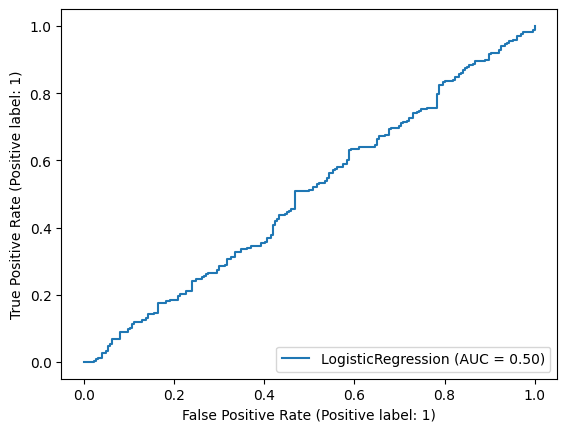

In [18]:
log_disp = RocCurveDisplay.from_estimator(logreg, X_test, Y_test)

EXTRA TREES

In [19]:
classifier = ExtraTreesClassifier(random_state=101)
classifier.fit(X_train, Y_train)

ExtraTreesClassifier(random_state=101)

In [20]:
Y_ext_pred = classifier.predict(X_test)
print (classification_report(Y_test, Y_ext_pred))

              precision    recall  f1-score   support

           0       0.46      0.16      0.24       226
           1       0.51      0.82      0.63       238

    accuracy                           0.50       464
   macro avg       0.49      0.49      0.43       464
weighted avg       0.49      0.50      0.44       464



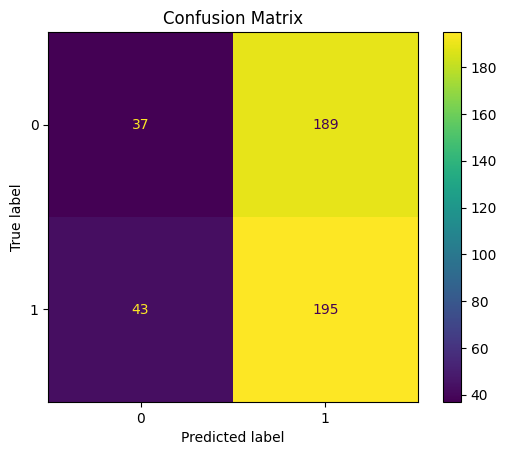

In [21]:
matrix = ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

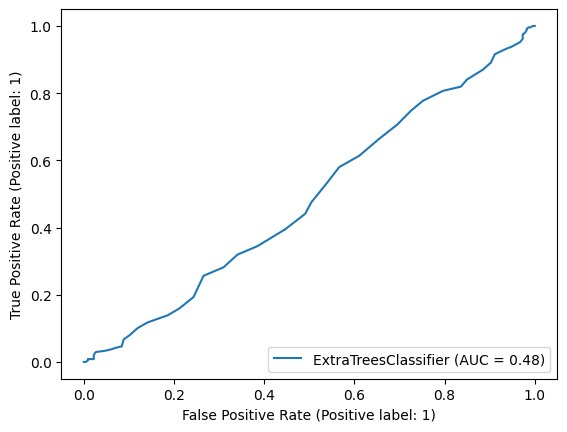

In [22]:
log_disp = RocCurveDisplay.from_estimator(classifier, X_test, Y_test)

In [23]:
feature_names=X.columns

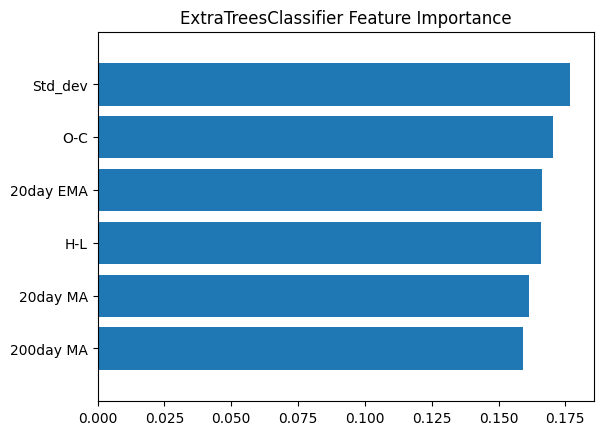

In [24]:
importance = classifier.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("ExtraTreesClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

NAIVE BAYES

In [25]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_nb_pred = nb.predict(X_test)
print (classification_report(Y_test, Y_nb_pred))

              precision    recall  f1-score   support

           0       0.59      0.12      0.20       226
           1       0.52      0.92      0.67       238

    accuracy                           0.53       464
   macro avg       0.56      0.52      0.43       464
weighted avg       0.55      0.53      0.44       464



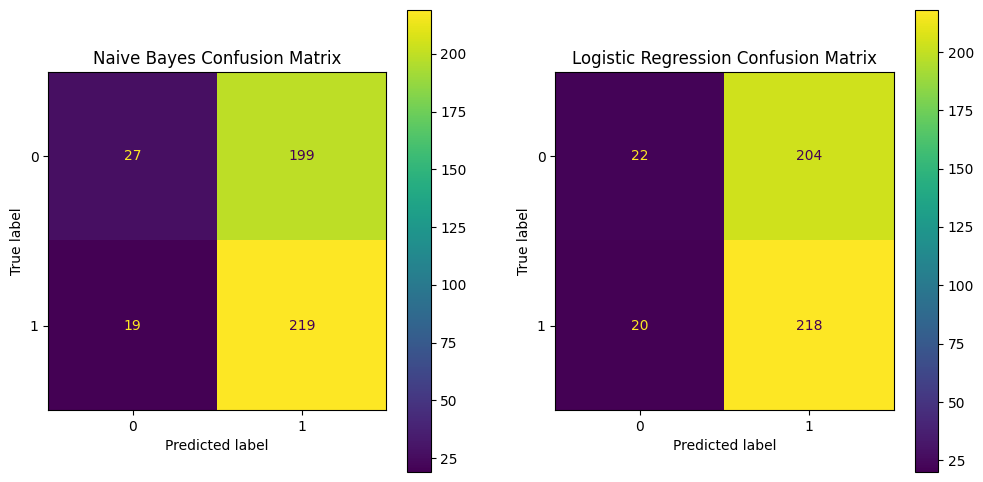

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix for nb
nb_matrix = ConfusionMatrixDisplay.from_estimator(nb, X_test, Y_test, ax=axes[0])
axes[0].set_title('Naive Bayes Confusion Matrix')

# Confusion matrix for logreg
logreg_matrix = ConfusionMatrixDisplay.from_estimator(logreg, X_test, Y_test, ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')

plt.show()


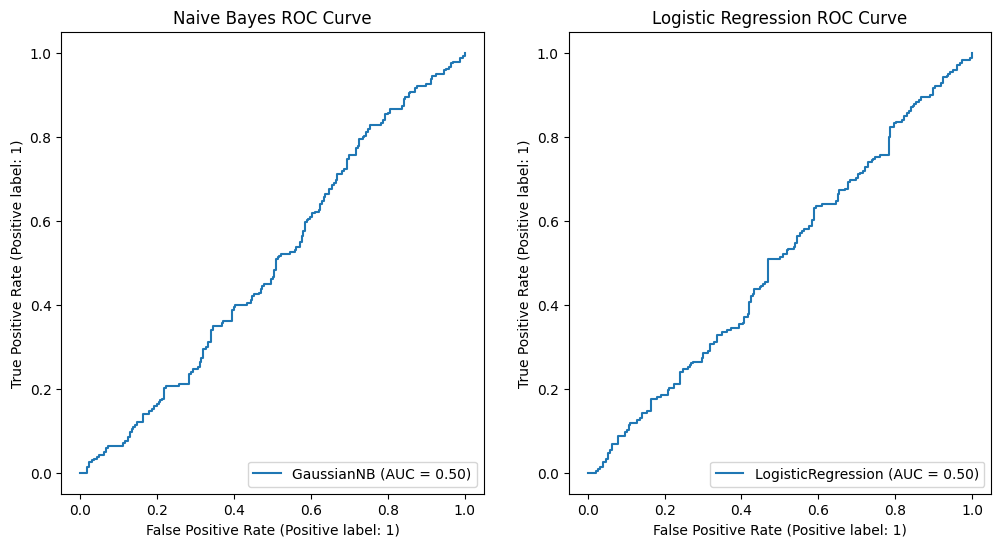

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ROC curve for nb
nb_disp = RocCurveDisplay.from_estimator(nb, X_test, Y_test, ax=axes[0])
axes[0].set_title('Naive Bayes ROC Curve')

# ROC curve for logreg
log_disp = RocCurveDisplay.from_estimator(logreg, X_test, Y_test, ax=axes[1])
axes[1].set_title('Logistic Regression ROC Curve')

plt.show()



In [28]:
# Cross-validation
log_reg_scores = cross_val_score(logreg, X_train, Y_train, cv=5)
extra_trees_scores = cross_val_score(classifier, X_train, Y_train, cv=5)
nb_scores = cross_val_score(nb, X_train, Y_train, cv=5)

# Print cross-validation results
print("Logistic Regression mean accuracy:", log_reg_scores.mean())
print("Logistic Regression std deviation:", log_reg_scores.std())
print("Naive Bayes mean accuracy:", nb_scores.mean())
print("Extra Trees mean accuracy:", extra_trees_scores.mean())
print("Extra Trees std deviation:", extra_trees_scores.std())
print("Naive Bayes std deviation:", nb_scores.std())

Logistic Regression mean accuracy: 0.502688132876812
Logistic Regression std deviation: 0.03448922487446926
Naive Bayes mean accuracy: 0.5135207984264587
Extra Trees mean accuracy: 0.4508618052014278
Extra Trees std deviation: 0.046526470052828825
Naive Bayes std deviation: 0.026693822516964234


In [29]:
dataset['Y_ext_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_ext_pred)):,-1] = Y_ext_pred
dataset['Y_logreg_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_logreg_pred)):,-1] = Y_logreg_pred
dataset['Y_nb_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_nb_pred)):,-1] = Y_nb_pred
trade_dataset = dataset.dropna()
trade_dataset

,open,high,low,close,H-L,O-C,20day MA,200day MA,20day EMA,Std_dev,Price_Rise,Y_ext_pred,Y_logreg_pred,Y_nb_pred
2052,152.330002,158.940002,152.250000,158.240005,6.690002,5.910004,158.918501,146.119700,155.717993,3.124855,0,0.0,1.0,0.0
2053,156.289993,157.190002,153.820007,155.889999,3.369995,-0.399994,158.874001,146.233200,156.558664,2.584771,0,1.0,1.0,1.0
2054,154.309998,155.399994,152.339996,153.309998,3.059998,-1.000000,158.643501,146.324050,156.335776,2.527843,1,1.0,1.0,1.0
2055,152.960007,155.080002,152.600006,153.789993,2.479996,0.829987,158.286501,146.400550,155.327183,2.514934,1,1.0,0.0,1.0
2056,153.770004,155.860001,153.770004,154.360001,2.089996,0.589996,157.989001,146.480850,154.814786,1.996869,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,144.500000,145.630005,144.289993,145.279999,1.340012,0.779999,147.940501,150.037051,144.908225,1.052031,1,1.0,1.0,1.0
2512,145.089996,146.169998,144.970001,145.940002,1.199997,0.850006,147.635500,150.080601,145.032149,1.000485,1,0.0,1.0,1.0
2513,145.649994,146.309998,145.360001,146.059998,0.949997,0.410004,147.370500,150.124351,145.334767,0.972214,0,1.0,1.0,1.0
2514,146.000000,146.009995,145.039993,145.729996,0.970001,-0.270004,147.059000,150.163951,145.576511,0.730673,1,0.0,1.0,1.0


In [30]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['close']/trade_dataset['close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

In [31]:
trade_dataset['Strategy Logistic Returns'] = 0.
trade_dataset['Strategy Logistic Returns'] = np.where(trade_dataset['Y_logreg_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

In [32]:
trade_dataset['Strategy Extra Tree Returns'] = 0.
trade_dataset['Strategy Extra Tree Returns'] = np.where(trade_dataset['Y_ext_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

In [33]:
trade_dataset['Strategy Naive Bayes Returns'] = 0.
trade_dataset['Strategy Naive Bayes Returns'] = np.where(trade_dataset['Y_nb_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

In [34]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Logistic Returns'] = np.cumsum(trade_dataset['Strategy Logistic Returns'])
trade_dataset['Cumulative Strategy Naive Bayes Returns'] = np.cumsum(trade_dataset['Strategy Naive Bayes Returns'])

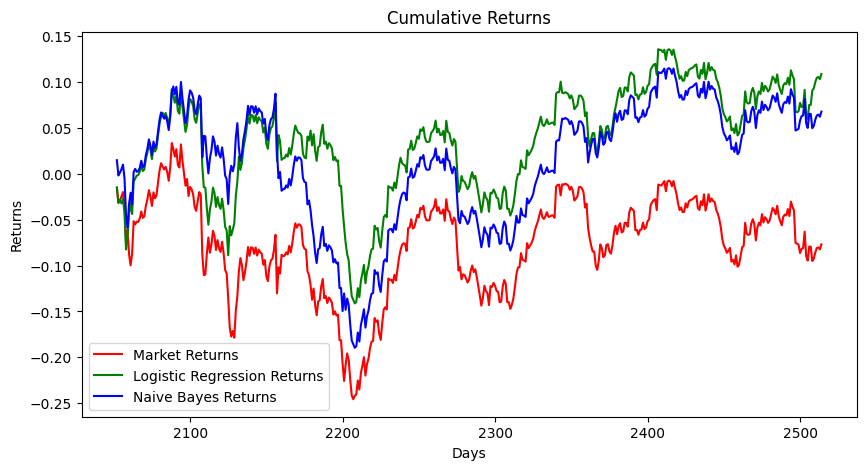

In [35]:
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Logistic Returns'], color='g', label='Logistic Regression Returns')
plt.plot(trade_dataset['Cumulative Strategy Naive Bayes Returns'], color='b', label='Naive Bayes Returns')
plt.title('Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.legend()
plt.show()